In [1]:
%matplotlib inline
from sklearn import linear_model
import scipy.stats
import os
import shutil
import re
import numpy as np
import pandas as pd
import seaborn as sns
from concurrent.futures import ProcessPoolExecutor
import matplotlib.pyplot as plt
from Bio import SeqIO
from src import contig_stats
sns.set_style("whitegrid")

In [2]:
path = "/media/NGS/Sequences/Acinetobacter_baumannii/NCBI"

In [3]:
def run(args):
    fasta, file = args
    id = re.sub(r".fa$", "", file)
    n25, n50, n75, m, c = contig_stats.stats(list(SeqIO.parse(fasta, "fasta")))
    return id, n25, n50, n75, m, c

In [4]:
args = ((os.path.join(path, file), file) for file in os.listdir(path))
data = list(ProcessPoolExecutor(25).map(run, args))

In [5]:
table = pd.DataFrame(data, columns=["id", "N25", "N50", "N75", "total_length", "counts"])
table

,id,N25,N50,N75,total_length,counts
0,GCA_001441465.1.fna,295144,137086,75650,3915804,87
1,GCA_000580735.1.fna,125344,72701,40232,4072690,178
2,GCA_000811305.3.fna,158205,79834,38721,3830520,117
3,GCA_001432425.1.fna,77814,52131,26042,3852216,194
4,GCA_001693095.1.fna,412952,328607,114381,4372983,1034
5,GCA_001666485.1.fna,124128,73097,41778,3850179,125
6,GCA_001414785.1.fna,37413,22794,12496,4007157,362
7,GCA_002017355.1.fna,209116,88448,45408,3870739,106
8,GCA_002017185.1.fna,180967,124506,73946,4027656,80
9,GCA_000809845.3.fna,70050,48738,27329,3953142,186


# N25, N50, N75

Text(0.5,1,'cumulative Acinetobacter baumannii contigs N25, N50, N75')

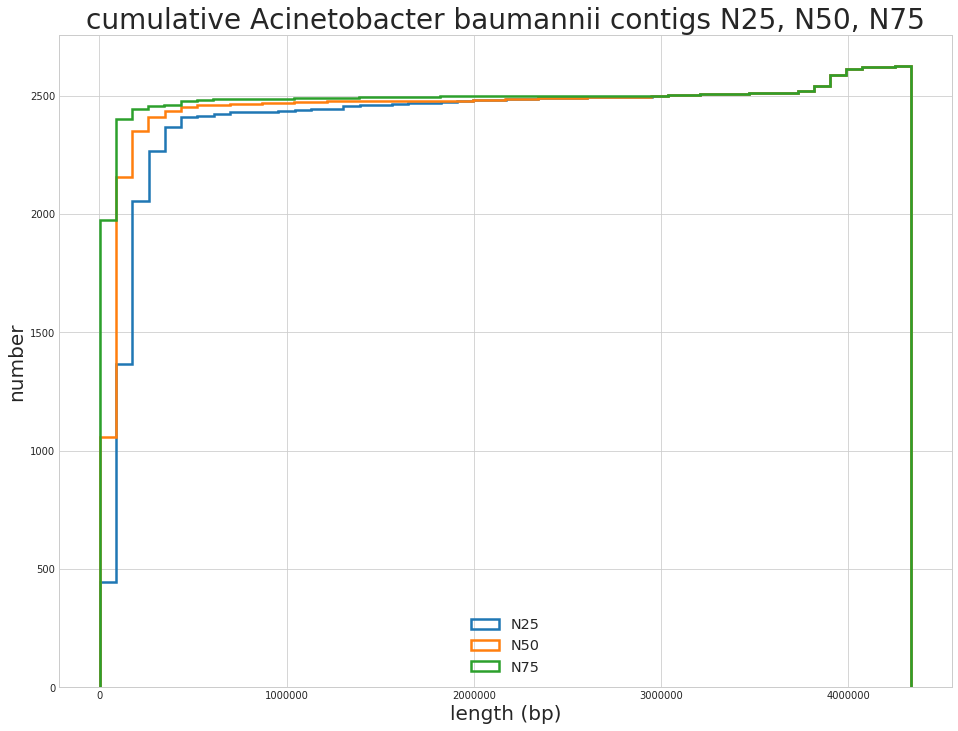

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table["N25"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N25")
ax.hist(table["N50"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N50")
ax.hist(table["N75"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N75")
ax.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.xlabel("length (bp)", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("cumulative Acinetobacter baumannii contigs N25, N50, N75", fontsize=28)
# plt.savefig("pics/cumulative Vibrio cholerae contigs quality.png")

Text(0.5,1,'cumulative Acinetobacter baumannii contigs N25, N50, N75')

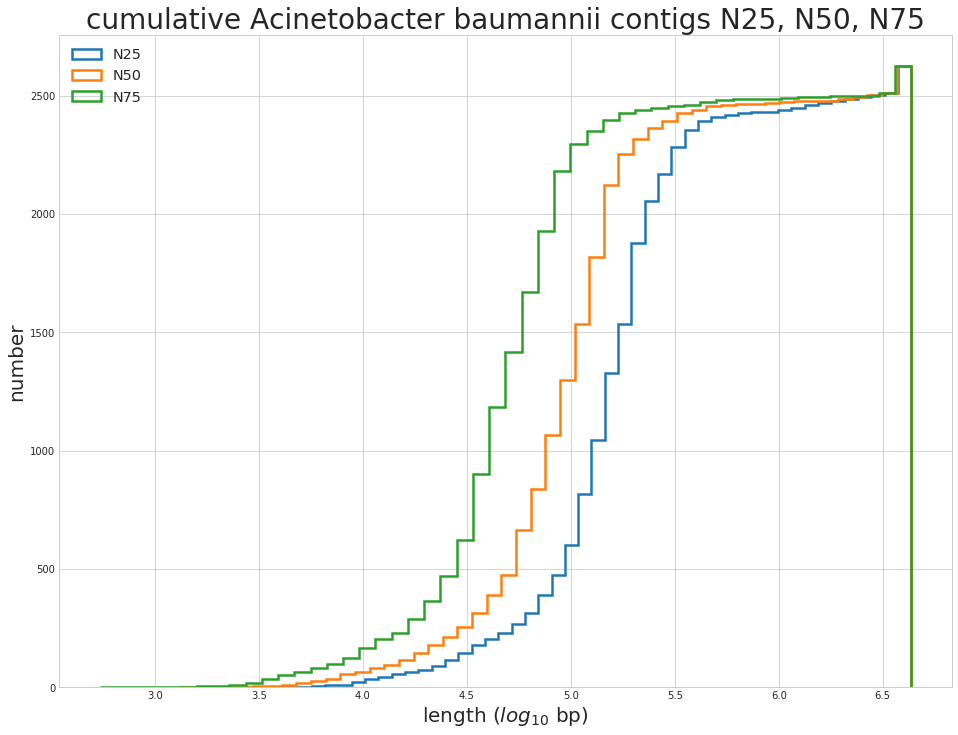

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(np.log10(table["N25"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N25")
ax.hist(np.log10(table["N50"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N50")
ax.hist(np.log10(table["N75"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N75")
ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xlabel("length ($log_{10}$ bp)", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("cumulative Acinetobacter baumannii contigs N25, N50, N75", fontsize=28)
# plt.savefig("pics/cumulative Vibrio cholerae contigs quality log-scale.png")

# Counts

Text(0.5,1,'Genome contig number distribution')

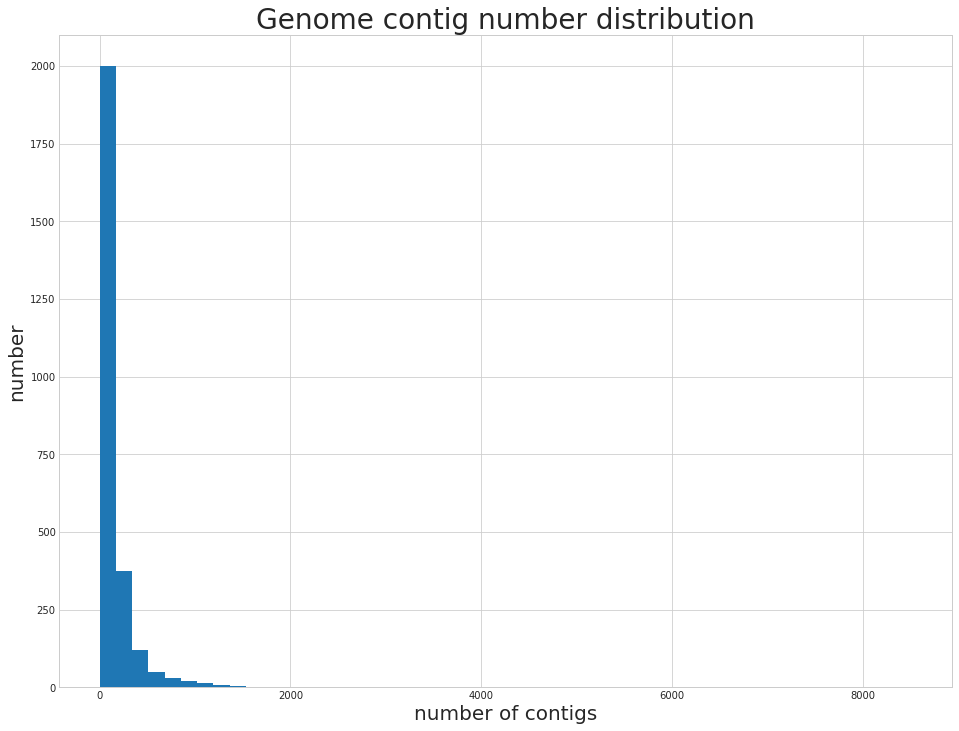

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution", fontsize=28)
# plt.savefig("pics/Acinetobacter baumannii genome contig number distribution.png")

Text(0.5,1,'Genome contig number distribution (> 270)')

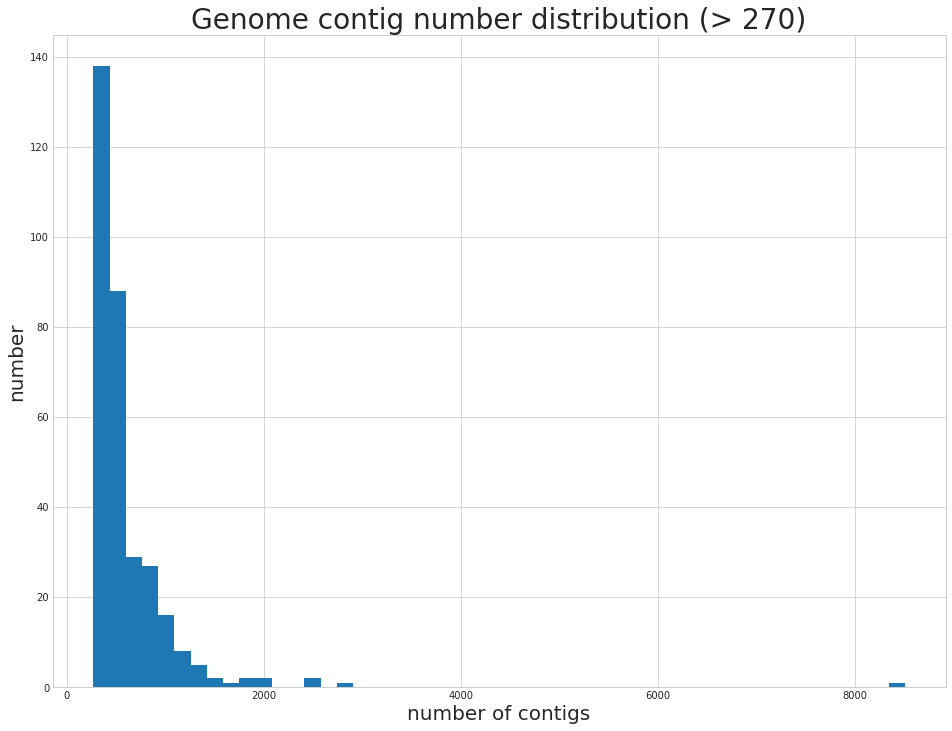

In [9]:
plt.figure(figsize=(16, 12))
plt.hist(table[table["counts"] > 270]["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution (> 270)", fontsize=28)
# plt.savefig("pics/Vibrio cholerae genome contig number distribution larger 200.png")

Text(0.5,1,'Genome contig number distribution (<= 250)')

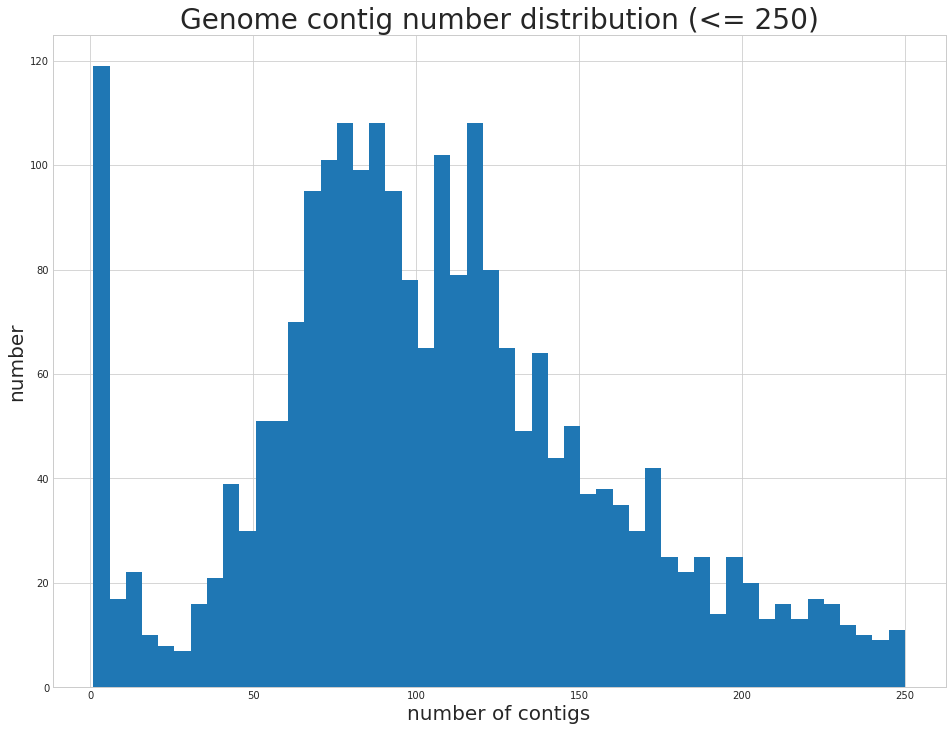

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table[table["counts"] <= 250]["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution (<= 250)", fontsize=28)
# plt.savefig("pics/Acinetobacter baumannii genome contig number distribution lower 200.png")

/home/chen1i6c04/jupyter_notebook/ven_jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


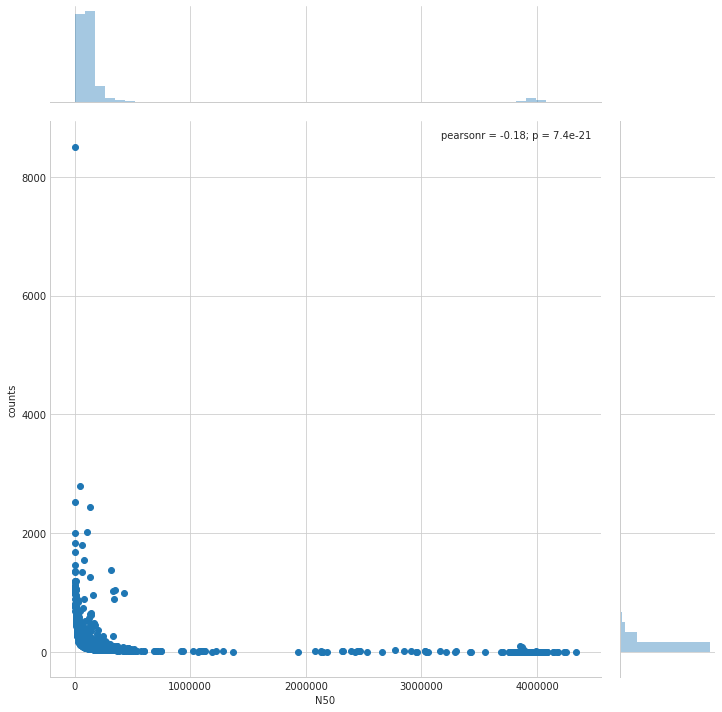

In [11]:
sns.jointplot(data=table, x="N50", y="counts", size=10)
# plt.savefig("pics/Salmonella enterica N50-count plot.png")

In [12]:
table["1/N50"] = 1/table["N50"]
table["1000/N50"] = table["1/N50"]*1000

/home/chen1i6c04/jupyter_notebook/ven_jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


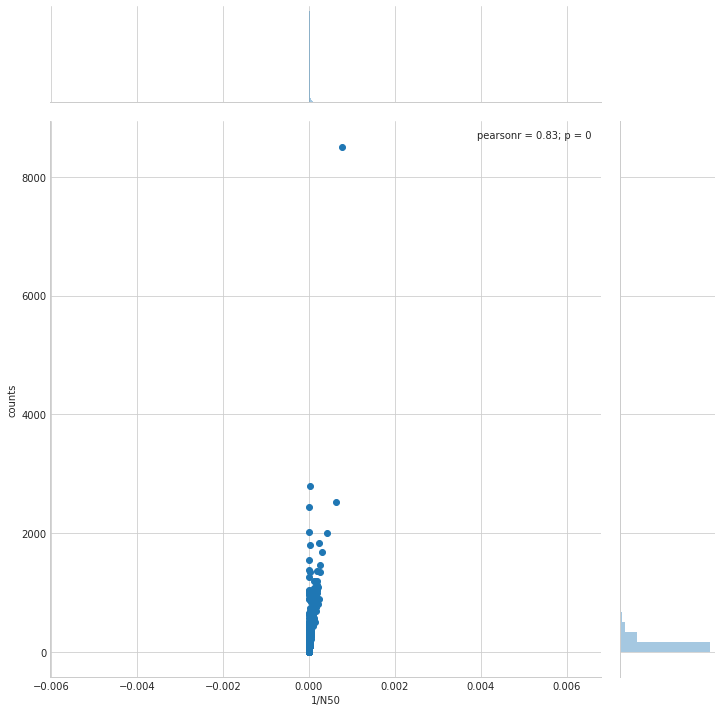

In [13]:
sns.jointplot(data=table, x="1/N50", y="counts", size=10)

/home/chen1i6c04/jupyter_notebook/ven_jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


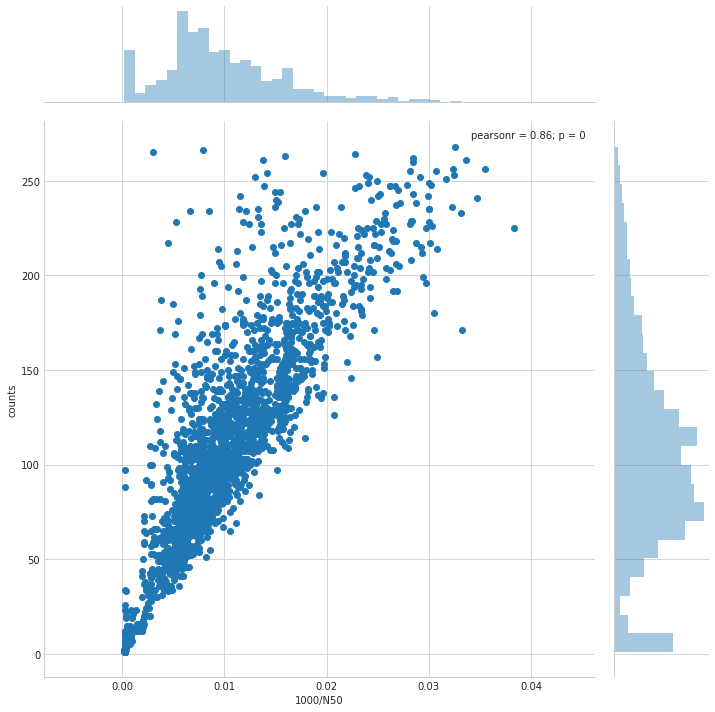

In [14]:
sns.jointplot(data=table[table["counts"] < 270], x="1000/N50", y="counts", size=10)

# comparison with serotypes

In [36]:
curated = table[(table["counts"] <= 250) & (table["N50"] >= 10 ** 4.5)]

In [37]:
curated.shape

(2276, 8)

In [38]:
curated['id'] = [i.replace('.fna', '') for i in curated['id']]

/home/chen1i6c04/jupyter_notebook/ven_jupyter/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Combine metadata selection

In [39]:
metafile = "/media/NGS/Sequences/Acinetobacter_baumannii/Acinetobacter_baumannii.csv"
meta = pd.read_csv(metafile)
meta["Assembly"] = [x.strip() for x in meta["Assembly"]]
meta = meta[meta["GC%"] != "-"]
meta = meta[meta["Size (Mb)"] != "-"]
meta["GC%"] = list(map(lambda x: float(x), meta["GC%"]))
meta["Size (Mb)"] = list(map(lambda x: float(x), meta["Size (Mb)"]))
meta

,#Organism/Name,Strain,CladeID,BioSample,BioProject,Group,SubGroup,Assembly,Size (Mb),GC%,Replicons,WGS,Scaffolds,Genes,Proteins,Release Date,Modify Date,Level,RefSeq FTP,GenBank FTP
0,Acinetobacter baumannii,AB030,19507,SAMN02940899,PRJNA256157,Proteobacteria,Gammaproteobacteria,GCA_000746645.1,4.33579,39.0000,chromosome:NZ_CP009257.1/CP009257.1,-,1,4296,3953,2014/08/29,2017/03/16,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
1,Acinetobacter baumannii ACICU,ACICU,19507,SAMN02603140,PRJNA17827,Proteobacteria,Gammaproteobacteria,GCA_000018445.1,3.99676,38.9013,chromosome:NC_010611.1/CP000863.1; plasmid pAC...,-,3,3839,3605,2008/04/15,2017/03/15,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
2,Acinetobacter baumannii AB307-0294,AB307-0294,19507,SAMN02603889,PRJNA30993,Proteobacteria,Gammaproteobacteria,GCA_000021145.1,3.76098,39.0000,chromosome:NC_011595.1/CP001172.1,-,1,3544,3360,2008/11/24,2017/03/15,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
3,Acinetobacter baumannii AB0057,AB0057,19507,SAMN02603051,PRJNA21111,Proteobacteria,Gammaproteobacteria,GCA_000021245.2,4.06388,39.1897,chromosome:NC_011586.2/CP001182.2; plasmid pAB...,-,2,3971,3812,2008/11/17,2017/07/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
4,Acinetobacter baumannii AYE,AYE,19507,SAMEA3138279,PRJNA28921,Proteobacteria,Gammaproteobacteria,GCA_000069245.1,4.04873,39.3357,chromosome:NC_010410.1/CU459141.1; plasmid p1A...,-,5,3900,3703,2008/02/26,2017/03/15,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
5,Acinetobacter baumannii D1279779,D1279779,19507,SAMN02603576,PRJNA61919,Proteobacteria,Gammaproteobacteria,GCA_000186665.4,3.71170,38.9872,chromosome:NC_020547.2/CP003967.2; plasmid pD1...,-,2,3564,3369,2013/03/20,2017/03/16,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
6,Acinetobacter baumannii MDR-TJ,MDR-TJ,19507,SAMN02603104,PRJNA52959,Proteobacteria,Gammaproteobacteria,GCA_000187205.4,4.15341,39.0716,chromosome:NC_017847.1/CP003500.1; plasmid pAB...,-,3,4071,3884,2012/05/02,2017/05/18,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
7,Acinetobacter baumannii 1656-2,1656-2,19507,SAMN02603494,PRJNA42153,Proteobacteria,Gammaproteobacteria,GCA_000188215.1,4.02311,39.0831,chromosome:NC_017162.1/CP001921.1; plasmid ABK...,-,3,3922,3705,2011/02/08,2017/03/15,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
8,Acinetobacter baumannii MDR-ZJ06,MDR-ZJ06,19507,SAMN02603878,PRJNA28333,Proteobacteria,Gammaproteobacteria,GCA_000226275.1,4.01143,39.0425,chromosome:NC_017171.1/CP001937.1; plasmid pMD...,-,2,3882,3667,2011/09/23,2017/03/15,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
9,Acinetobacter baumannii TYTH-1,TYTH-1,19507,SAMN02603667,PRJNA74551,Proteobacteria,Gammaproteobacteria,GCA_000302575.1,3.95737,39.0000,chromosome:NC_018706.1/CP003856.1,-,1,3795,3628,2012/10/03,2017/03/15,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...


In [40]:
curated = pd.merge(curated, meta, left_index=True, right_on="Assembly", left_on='id')

/home/chen1i6c04/jupyter_notebook/ven_jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


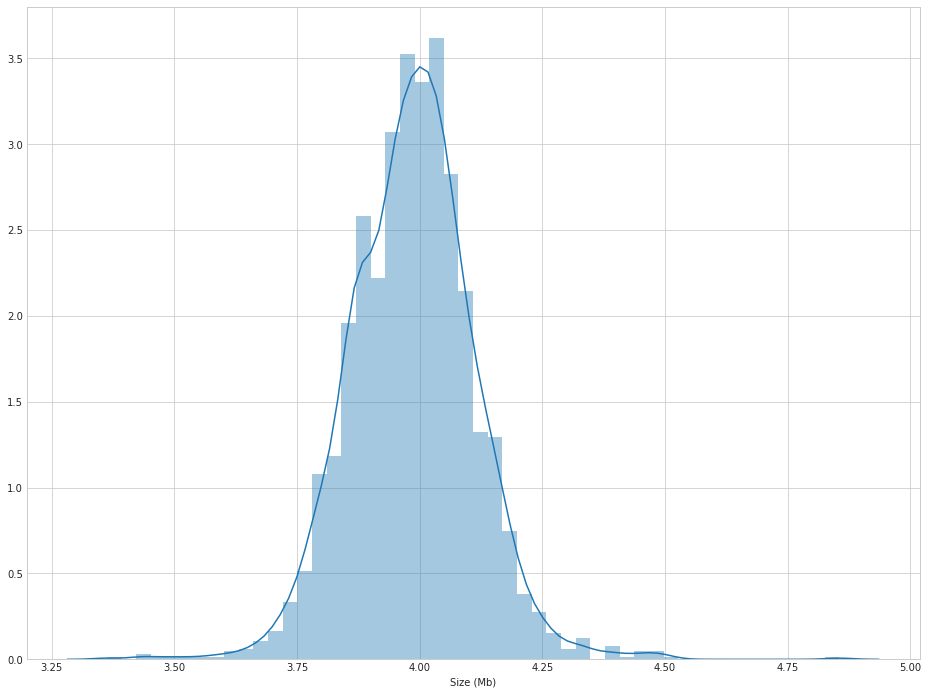

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
sns.distplot(curated["Size (Mb)"], ax=ax)
# fig.savefig("pics/Vibrio cholerae genome size distribution.png")

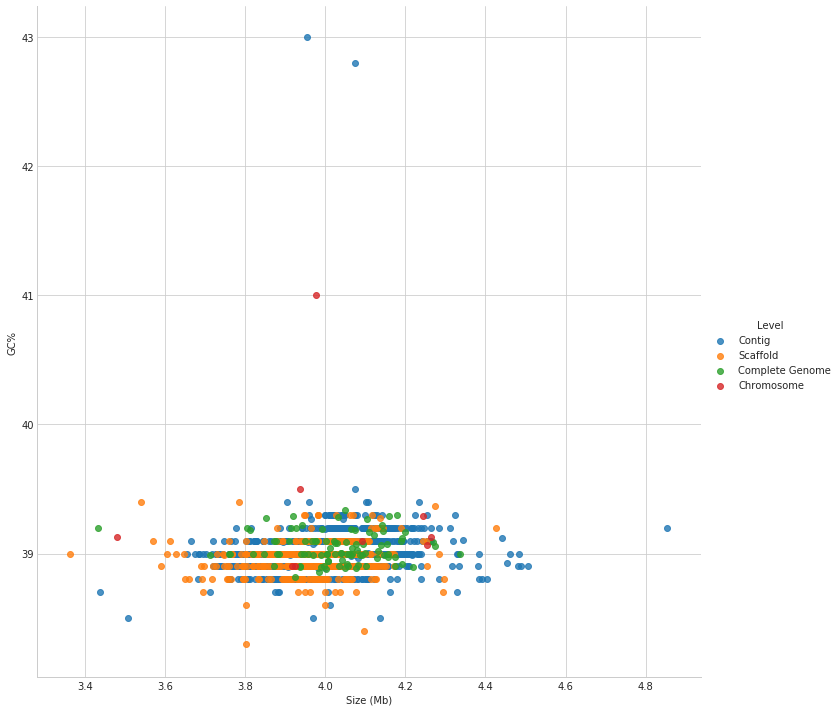

In [42]:
sns.lmplot(data=curated, x="Size (Mb)", y="GC%", hue="Level", fit_reg=False, size=10)
# plt.savefig("pics/Vibrio cholerae genome size-GC content plot.png")

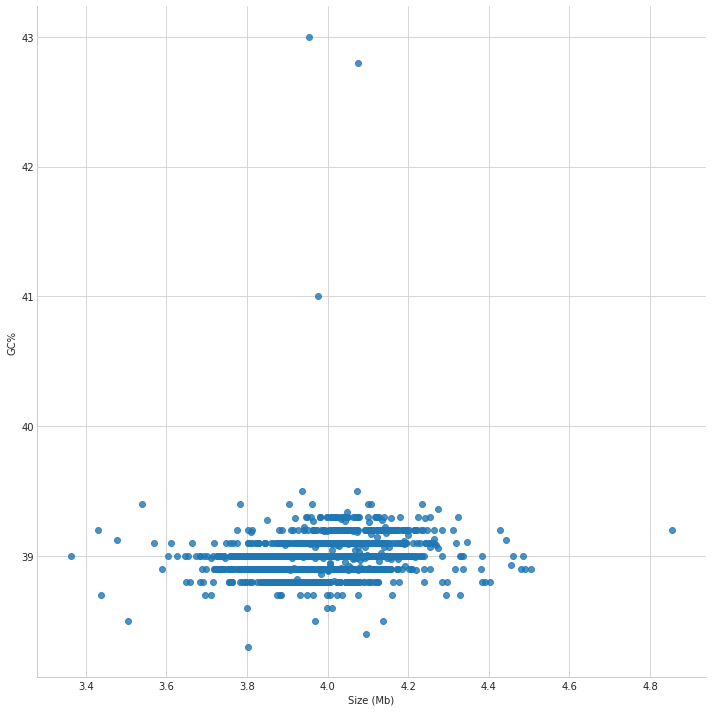

In [43]:
sns.lmplot(data=curated, x="Size (Mb)", y="GC%", fit_reg=False, size=10)
# plt.savefig("pics/Vibrio cholerae genome size-GC content plot.png")

In [52]:
model = linear_model.HuberRegressor(epsilon=4)
model.fit(curated[["Size (Mb)"]].as_matrix(), list(curated["GC%"]))

HuberRegressor(alpha=0.0001, epsilon=4, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)

In [53]:
curated["y_mean"] = model.predict(curated[["Size (Mb)"]])
curated["corrected_y"] = curated["GC%"] - curated["y_mean"]
curated["outliers"] = model.outliers_

/home/chen1i6c04/jupyter_notebook/ven_jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


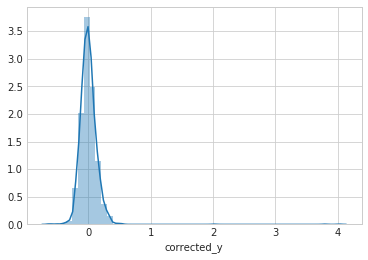

In [54]:
sns.distplot(curated["corrected_y"])

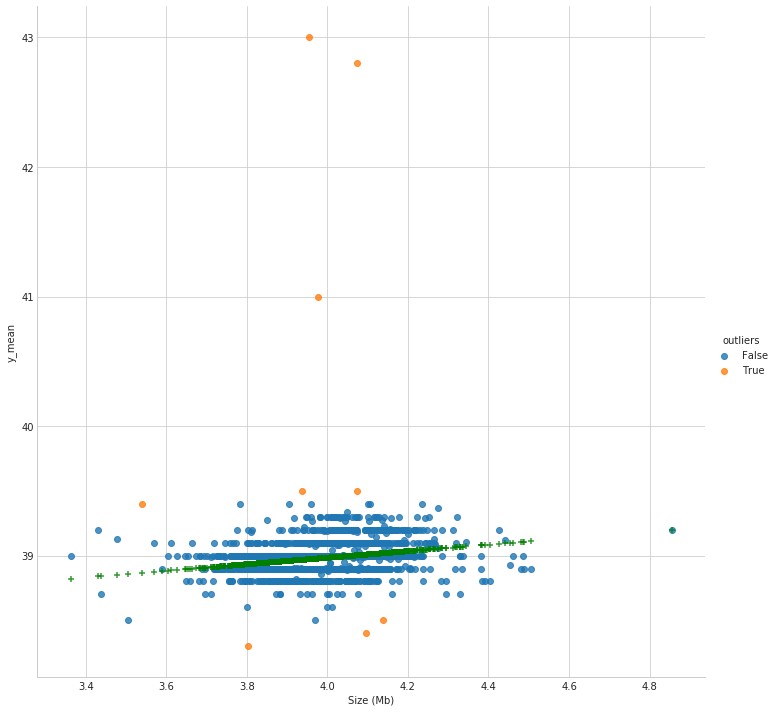

In [55]:
sns.lmplot(data=curated, x="Size (Mb)", y="GC%", hue="outliers", fit_reg=False, size=10)
sns.regplot(x="Size (Mb)", y="y_mean", data=curated, color="g", marker="+", fit_reg=False)
# plt.savefig("pics/Vibrio cholerae genome size-GC content plot outliers.png")

In [56]:
curated = curated[~curated['outliers']]

In [57]:
curated.to_csv("results/Acinetobacter_baumannii_data_clean.tsv", sep="\t", index=False)

# selection of clean dataset

In [60]:
dst = "/media/NGS/Sequences/Acinetobacter_baumannii/NCBI_clean"
for file in curated["id"]:
    shutil.copyfile(os.path.join(path, file + '.fna'), os.path.join(dst, file + '.fna'))